# <center> Moodify Project</center>

## About Dataset
### Moodify Dataset
The main idea of Moodify project is to classify songs not only based on their lyrical and musical features, but also incorporating emotions, in order to provide users with more successful recommendation outputs. Moodify aims to categorize songs into four main emotions and utilize the similarities in musical features within these categories to offer users more effective recommendations, weighting them with emotions.

In this perspective, we build LGBM model to predict emotions of songs and we use this dataset in our both test and recommendation phases. It contains nearly 278.000 songs from Spotify and all songs emotionally labeled.

You can find more information about project and dataset in our project's GitHub repository.

https://github.com/orzanai/Moodify

Additional information about variables:
* Labels: {'sad': 0, 'happy': 1, 'energetic': 2, 'calm': 3}

* Acousticness: A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.

* Danceability: Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.

* Energy: Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.

* Instrumentalness: Predicts whether a track contains no vocals. “Ooh” and “aah” sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly “vocal”. The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.

* Liveness: Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides a strong likelihood that the track is live.

* Loudness: the overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing the relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typically range between -60 and 0 db.

* Speechiness: Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audiobook, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.

* Valence: A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).

* Tempo: The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, the tempo is the speed or pace of a given piece and derives directly from the average beat duration.

* Spec_rate" typically refers to the spectral rate or spectral flux of a song. Spectral rate describes how quickly the frequency spectrum changes over time, which helps measure the song's dynamics and timbre. This feature captures how the sound texture evolves, reflecting characteristics like beats, rhythmic changes, and energy levels. A high spectral rate usually indicates fast, high-energy parts with many frequency changes, like a rapid drum beat or sharp changes in melody. In contrast, a low spectral rate suggests a smoother, more constant sound, as in slow or ambient sections.

#### Objective:

    1. Analyze the data
    
    2. Train multiple models on this data.
    
    3. Create data pipeline
    
    4. Create a presentation slide to present your work. 
    

## Importing libraries


In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import pandas as pd

In [3]:
pd.set_option('display.max_columns', None)

## Loading our data

In [315]:
df = pd.read_csv('278k_song_labelled.csv')
df.head()

,Unnamed: 0,duration (ms),danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,spec_rate,labels
0,0,195000.0,0.611,0.614,-8.815,0.0672,0.0169,0.000794,0.7530,0.520,128.050,3.446154e-07,2
1,1,194641.0,0.638,0.781,-6.848,0.0285,0.0118,0.009530,0.3490,0.250,122.985,1.464234e-07,1
2,2,217573.0,0.560,0.810,-8.029,0.0872,0.0071,0.000008,0.2410,0.247,170.044,4.007850e-07,1
3,3,443478.0,0.525,0.699,-4.571,0.0353,0.0178,0.000088,0.0888,0.199,92.011,7.959809e-08,0
4,4,225862.0,0.367,0.771,-5.863,0.1060,0.3650,0.000001,0.0965,0.163,115.917,4.693131e-07,1


In [316]:
#dropping the unnamed column
df.drop('Unnamed: 0', axis=1, inplace=True)

## Exploratory Data Analysis and Visualization

In [317]:
df.head()

,duration (ms),danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,spec_rate,labels
0,195000.0,0.611,0.614,-8.815,0.0672,0.0169,0.000794,0.7530,0.520,128.050,3.446154e-07,2
1,194641.0,0.638,0.781,-6.848,0.0285,0.0118,0.009530,0.3490,0.250,122.985,1.464234e-07,1
2,217573.0,0.560,0.810,-8.029,0.0872,0.0071,0.000008,0.2410,0.247,170.044,4.007850e-07,1
3,443478.0,0.525,0.699,-4.571,0.0353,0.0178,0.000088,0.0888,0.199,92.011,7.959809e-08,0
4,225862.0,0.367,0.771,-5.863,0.1060,0.3650,0.000001,0.0965,0.163,115.917,4.693131e-07,1


In [318]:
df.shape

(277938, 12)

In [319]:
df.columns

Index(['duration (ms)', 'danceability', 'energy', 'loudness', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'spec_rate', 'labels'],
      dtype='object')

In [320]:
# checking dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277938 entries, 0 to 277937
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   duration (ms)     277938 non-null  float64
 1   danceability      277938 non-null  float64
 2   energy            277938 non-null  float64
 3   loudness          277938 non-null  float64
 4   speechiness       277938 non-null  float64
 5   acousticness      277938 non-null  float64
 6   instrumentalness  277938 non-null  float64
 7   liveness          277938 non-null  float64
 8   valence           277938 non-null  float64
 9   tempo             277938 non-null  float64
 10  spec_rate         277938 non-null  float64
 11  labels            277938 non-null  int64  
dtypes: float64(11), int64(1)
memory usage: 25.4 MB


In [321]:
#xhecking for missing values
df.isnull().sum()

duration (ms)       0
danceability        0
energy              0
loudness            0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
spec_rate           0
labels              0
dtype: int64

* There are no missing values in the dataset

In [322]:
# checking for duplicates
df.duplicated().sum()

1678

In [323]:
df[df.duplicated()]

,duration (ms),danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,spec_rate,labels
1357,168842.0,0.667,0.881,-3.366,0.0815,0.3500,0.000000,0.0742,0.7110,104.968,4.826998e-07,1
2998,172196.0,0.802,0.820,-5.969,0.1460,0.0579,0.000000,0.1490,0.6130,164.005,8.478710e-07,1
3065,170053.0,0.797,0.640,-6.272,0.1940,0.1480,0.000000,0.2090,0.4860,100.002,1.140821e-06,1
5658,198865.0,0.172,0.128,-23.009,0.0345,0.9080,0.858000,0.0997,0.0849,92.737,1.734845e-07,3
6245,224947.0,0.488,0.815,-4.354,0.0438,0.0148,0.002070,0.0744,0.0654,174.994,1.947125e-07,1
...,...,...,...,...,...,...,...,...,...,...,...,...
277663,238640.0,0.558,0.470,-5.500,0.0316,0.6800,0.914000,0.5320,0.4270,118.060,1.324170e-07,3
277770,280427.0,0.757,0.578,-3.886,0.0386,0.0110,0.006720,0.1270,0.9540,102.960,1.376472e-07,1
277837,226547.0,0.812,0.388,-11.299,0.0430,0.3270,0.516000,0.0844,0.7150,109.216,1.898061e-07,0
277889,289533.0,0.663,0.546,-5.234,0.0269,0.0322,0.000572,0.1070,0.6560,88.171,9.290823e-08,1


In [324]:
#inspecting duplicates
df.iloc[1357:1359,]

,duration (ms),danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,spec_rate,labels
1357,168842.0,0.667,0.881,-3.366,0.0815,0.3500,0.0,0.0742,0.711,104.968,4.826998e-07,1
1358,168787.0,0.434,0.688,-5.805,0.0471,0.0213,0.0,0.1310,0.508,147.655,2.790499e-07,2


* There are about 1678 duplicates

In [325]:
df.drop_duplicates(inplace=True)

In [326]:
df.duplicated().sum()

0

In [327]:
#checking the descriptive statistic
df.describe()

,duration (ms),danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,spec_rate,labels
count,2.762600e+05,276260.000000,276260.000000,276260.000000,276260.000000,276260.000000,276260.000000,276260.000000,276260.000000,276260.000000,2.762600e+05,276260.000000
mean,2.324221e+05,0.552509,0.556614,-10.370273,0.087960,0.386906,0.255386,0.189151,0.449543,119.190571,4.758558e-07,1.179049
std,1.170172e+05,0.188941,0.279694,6.672366,0.112613,0.364564,0.373908,0.163513,0.267527,30.473167,9.202471e-07,1.021453
min,6.706000e+03,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000
25%,1.720000e+05,0.431000,0.341000,-12.756000,0.035900,0.033900,0.000000,0.096200,0.220000,95.066750,1.531601e-07,0.000000
50%,2.130530e+05,0.571000,0.591000,-8.406000,0.047100,0.263000,0.001100,0.121000,0.434000,119.936000,2.346238e-07,1.000000
75%,2.648455e+05,0.693000,0.792000,-5.848000,0.082300,0.754000,0.647000,0.226000,0.665000,138.852000,4.454110e-07,2.000000
max,3.919895e+06,0.989000,1.000000,4.882000,0.965000,0.996000,1.000000,1.000000,1.000000,244.947000,5.971860e-05,3.000000


In [328]:
#coverting duration (ms) to seconds then to minutes
def to_minutes(x):
    seconds = x / 1000 # convert to seconds
    minutes = seconds / 60 # convert to minutes
    return minutes

In [329]:
df['duration (ms)'] = df['duration (ms)'].apply(to_minutes)

In [330]:
#decoding the label feature for more understanding
def label_feat(x):
    if x == 0:
        return 'sad' 
    elif x == 1:
        return 'happy'
    elif x == 2:
        return 'energetic'
    elif x==3:
        return 'calm'

In [331]:
df['emotions'] = df['labels'].apply(label_feat)

In [332]:
df.head()

,duration (ms),danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,spec_rate,labels,emotions
0,3.250000,0.611,0.614,-8.815,0.0672,0.0169,0.000794,0.7530,0.520,128.050,3.446154e-07,2,energetic
1,3.244017,0.638,0.781,-6.848,0.0285,0.0118,0.009530,0.3490,0.250,122.985,1.464234e-07,1,happy
2,3.626217,0.560,0.810,-8.029,0.0872,0.0071,0.000008,0.2410,0.247,170.044,4.007850e-07,1,happy
3,7.391300,0.525,0.699,-4.571,0.0353,0.0178,0.000088,0.0888,0.199,92.011,7.959809e-08,0,sad
4,3.764367,0.367,0.771,-5.863,0.1060,0.3650,0.000001,0.0965,0.163,115.917,4.693131e-07,1,happy


In [333]:
df.describe()

,duration (ms),danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,spec_rate,labels
count,276260.000000,276260.000000,276260.000000,276260.000000,276260.000000,276260.000000,276260.000000,276260.000000,276260.000000,276260.000000,2.762600e+05,276260.000000
mean,3.873701,0.552509,0.556614,-10.370273,0.087960,0.386906,0.255386,0.189151,0.449543,119.190571,4.758558e-07,1.179049
std,1.950287,0.188941,0.279694,6.672366,0.112613,0.364564,0.373908,0.163513,0.267527,30.473167,9.202471e-07,1.021453
min,0.111767,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000
25%,2.866667,0.431000,0.341000,-12.756000,0.035900,0.033900,0.000000,0.096200,0.220000,95.066750,1.531601e-07,0.000000
50%,3.550883,0.571000,0.591000,-8.406000,0.047100,0.263000,0.001100,0.121000,0.434000,119.936000,2.346238e-07,1.000000
75%,4.414092,0.693000,0.792000,-5.848000,0.082300,0.754000,0.647000,0.226000,0.665000,138.852000,4.454110e-07,2.000000
max,65.331583,0.989000,1.000000,4.882000,0.965000,0.996000,1.000000,1.000000,1.000000,244.947000,5.971860e-05,3.000000


In [334]:
#creating a bin for the duration

In [335]:
# checking how the variables features affect the target variable

#### Emotion distribution across the dataset

<Axes: xlabel='emotions', ylabel='count'>

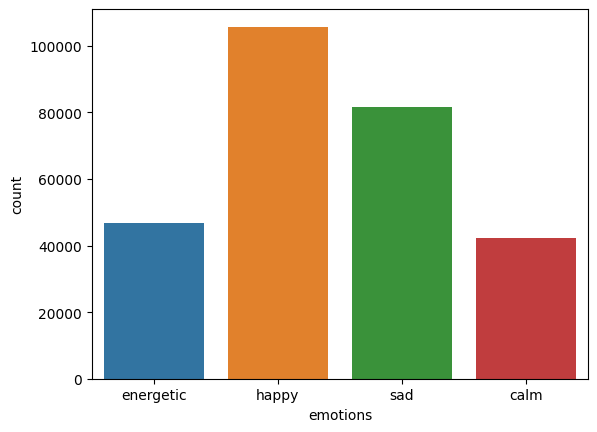

In [336]:
sns.countplot(data=df, x='emotions')

In [337]:
df.emotions.value_counts()

emotions
happy        105728
sad           81628
energetic     46716
calm          42188
Name: count, dtype: int64

inference:
* There are more happy emotion labels of `105728`, sad `81628` , energetic `46716` , calm `42188` 

### Duration (ms) against the emotions or Label

<Axes: xlabel='duration (ms)', ylabel='Density'>

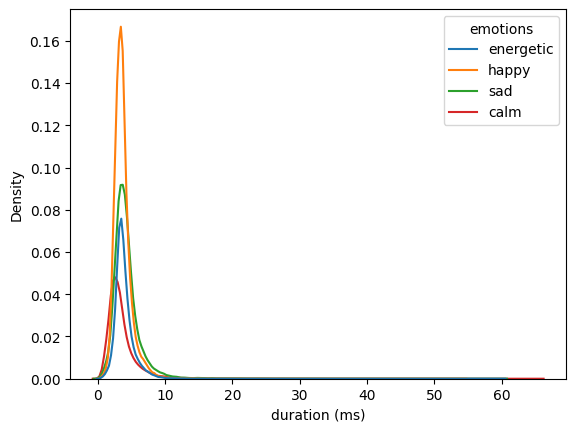

In [342]:
sns.kdeplot(x='duration (ms)', hue='emotions', data=df)

<Axes: xlabel='labels', ylabel='duration (ms)'>

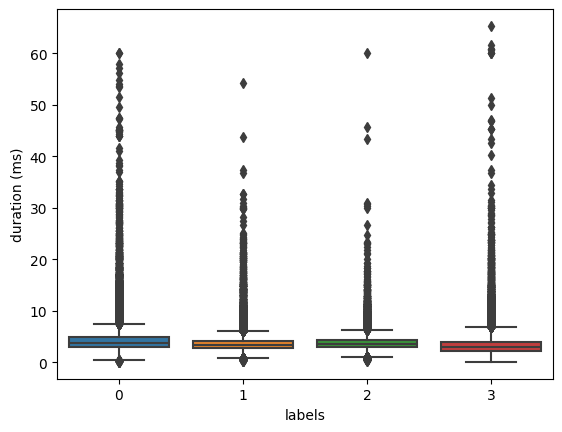

In [344]:
sns.boxplot(x='labels', y='duration (ms)', data=df)

In [346]:
# Outlier detection
Q1 = df["duration (ms)"].quantile(0.25)
Q3 = df["duration (ms)"].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df["duration (ms)"] < (Q1 - 1.5 * IQR)) | (df["duration (ms)"] > (Q3 + 1.5 * IQR))]

In [347]:
outliers

,duration (ms),danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,spec_rate,labels,emotions
3,7.391300,0.525,0.699,-4.571,0.0353,0.01780,0.000088,0.0888,0.1990,92.011,7.959809e-08,0,sad
185,7.010000,0.558,0.690,-7.467,0.0305,0.02840,0.194000,0.1060,0.2360,99.933,7.251545e-08,0,sad
215,8.445333,0.552,0.643,-14.523,0.1400,0.14400,0.002700,0.0878,0.7630,136.764,2.762867e-07,1,happy
216,7.222883,0.547,0.776,-7.150,0.0847,0.00035,0.048300,0.0769,0.2350,139.962,1.954436e-07,2,energetic
258,9.095550,0.457,0.599,-5.693,0.0273,0.01150,0.000003,0.7090,0.3100,136.102,5.002446e-08,0,sad
...,...,...,...,...,...,...,...,...,...,...,...,...,...
277771,9.512217,0.379,0.782,-8.163,0.0358,0.04720,0.748000,0.2650,0.5490,101.698,6.272635e-08,0,sad
277780,8.687550,0.661,0.273,-13.381,0.2050,0.04690,0.551000,0.1300,0.0784,126.012,3.932831e-07,3,calm
277817,7.999333,0.424,0.243,-25.239,0.0626,0.86000,0.021400,0.1490,0.3730,97.528,1.304275e-07,0,sad
277910,7.508450,0.301,0.853,-2.264,0.0369,0.20800,0.003280,0.3540,0.1120,150.423,8.190772e-08,0,sad


In [348]:
happy = df[df['emotions'] == 'happy']
energetic = df[df['emotions'] == 'energetic']
calm = df[df['emotions'] == 'calm']
sad = df[df['emotions'] == 'sad']

<Axes: xlabel='emotions', ylabel='duration (ms)'>

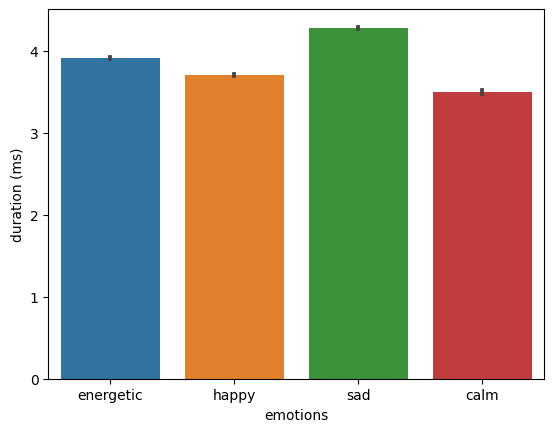

In [349]:
sns.barplot(x='emotions', y='duration (ms)', data=df)

In [350]:
df.groupby('emotions')['duration_min'].mean()

KeyError: 'Column not found: duration_min'

**Inference:**
* from the above, we can see the song duration has no interaction with the different label, no particular song emotion is being determined by the time duration
* The mean time duration for the different emotions are also the same, no much significant difference.
* There are outliers for time duration across various emotion, so we can't say that increased time duration  affect the song emotion

Inconclusion the time duration does not strongly determine the emotion of the song

### Danceability vs Label

In [ ]:
sns.boxplot(x='emotions', y='danceability', data=df)

In [ ]:
sns.kdeplot(x='danceability', hue='emotions', data=df)

In [ ]:
df.groupby('emotions')['danceability'].mean()

**Inference:**
* from the above, it was noticed that danceability has effect on the emotion of the song, song with different danceability has different emotions, like happy song high high danceability, energetic and sad has moderate, then calm has lesser danceability.
* we also observe that the mean values of danceability across different emotions varies and so significant

### Energy vs Label

In [ ]:
sns.boxplot(x='emotions', y='energy', data=df)

In [ ]:
df.groupby('emotions')['energy'].mean()

**Inference:**
* From the above, we can see that the energy of the song greatly determine the emotion of the song, songs with high energy from 0.6 and above, depict energetic and happy emotion song, while moderate energy between 0.25 to 0.55 depict sad emotion songs, then while that of low energy from 0.0 to 0.25 depict sad emotion song.
* we can also observe that the mean danceability across the different emotions has significant difference

### Loudness vs Label

In [ ]:
sns.boxplot(x='emotions', y='loudness', data=df)

In [ ]:
df.groupby('emotions')['energy'].mean()

**Inference:**
* It was noticed that songs with loudness value above 0 tends to have both energetic and happy emotions, while those below 0 tends to be either sad or calm, so the loudness of a song strongly determines it emotion.
* we can also see that the mean loudness across the different emotions varies withe significant difference

### Speechiness vs Label

In [ ]:
sns.kdeplot(x='speechiness', hue='emotions', data=df)

In [ ]:
sns.boxplot(x='emotions', y='speechiness', data=df)

In [ ]:
df.groupby('emotions')['speechiness'].mean()

**Inference:**
* from the above there aren't a significant different between the mean speechiness of the different emotion, all the emotions has most of their speechiness values between 0.0 to 0.2 
* so in conclusion we can say that the speechiness value doesnt really tell of the emotion of the song

### Acousticness vs Label

In [ ]:
sns.boxplot(x='emotions', y='acousticness', data=df)

In [ ]:
sns.kdeplot(x='acousticness', hue='emotions', data=df)

**Inference:**
* from the above, we can see very clearly that the acoustic nature of a song clearly tells of the song emotion. songs with low acousticness tends to depict a energetic and happy emotion song, while songs with low high acousticness tends to depict a sad and a calm song

### Instrumentalness vs Label


<Axes: xlabel='emotions', ylabel='instrumentalness'>

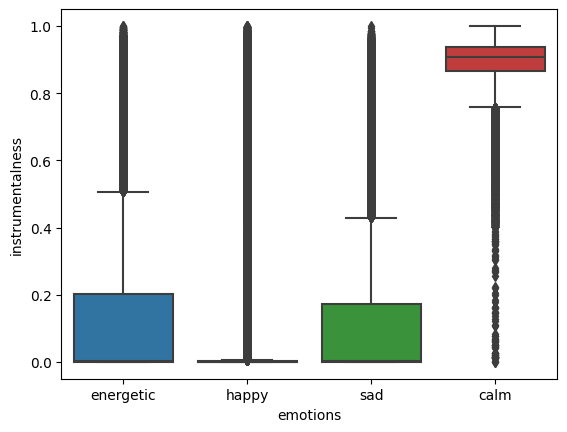

In [351]:
sns.boxplot(x='emotions', y='instrumentalness', data=df)

<Axes: xlabel='instrumentalness', ylabel='Density'>

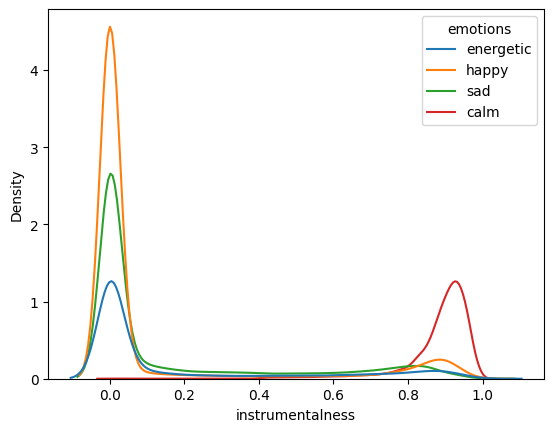

In [352]:
sns.kdeplot(x='instrumentalness', hue='emotions', data=df)

In [353]:
df.groupby('emotions')['instrumentalness'].mean()

emotions
calm         0.883259
energetic    0.175648
happy        0.114804
sad          0.158604
Name: instrumentalness, dtype: float64

**inference:**
* we can also say here that songs with high instrumentalness tends to be of calm emotion, while those of lower instrumentalness, tends to be either energetic, happy and sad emotions

### Liveness vs Label

<Axes: xlabel='liveness', ylabel='Density'>

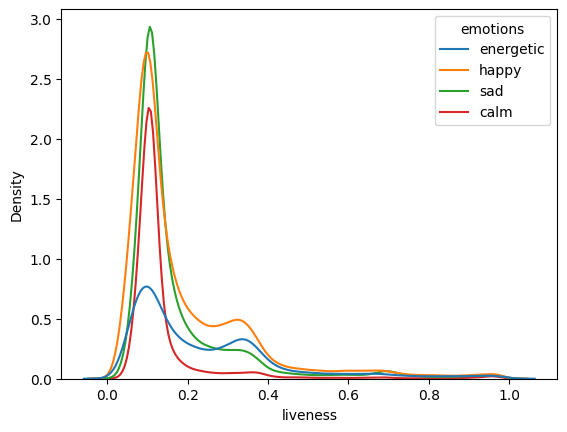

In [354]:
sns.kdeplot(x='liveness', hue='emotions', data=df)

<Axes: xlabel='emotions', ylabel='liveness'>

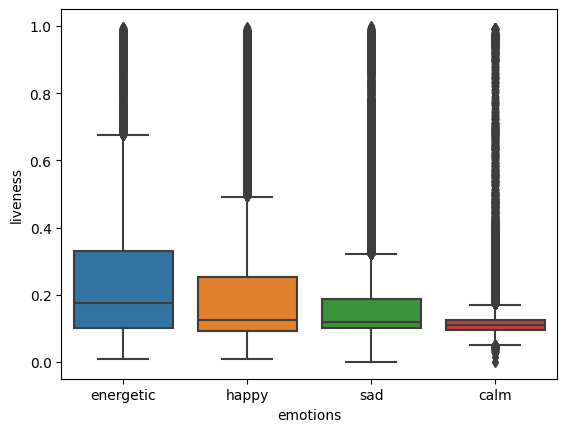

In [355]:
sns.boxplot(x='emotions', y='liveness', data=df)

In [356]:
df.groupby('emotions')['liveness'].mean()

emotions
calm         0.140158
energetic    0.240259
happy        0.194223
sad          0.178654
Name: liveness, dtype: float64

**inference:**
* from the above we can see that aren't much difference between the different emotions with respect to there different liveness value, liveness value doesnt really tell of the emotion of the song, the liveness value for all the emotion mostly fall between 0.0 to 0.4 and there mean liveness are mostly the same.

### Valence vs Label


<Axes: xlabel='emotions', ylabel='valence'>

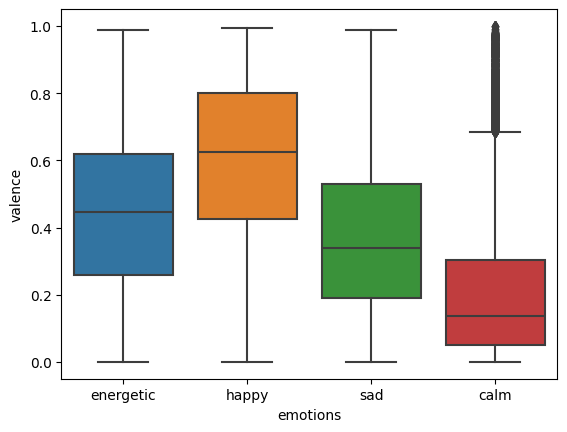

In [357]:
sns.boxplot(x='emotions', y='valence', data=df)

<Axes: xlabel='valence', ylabel='Density'>

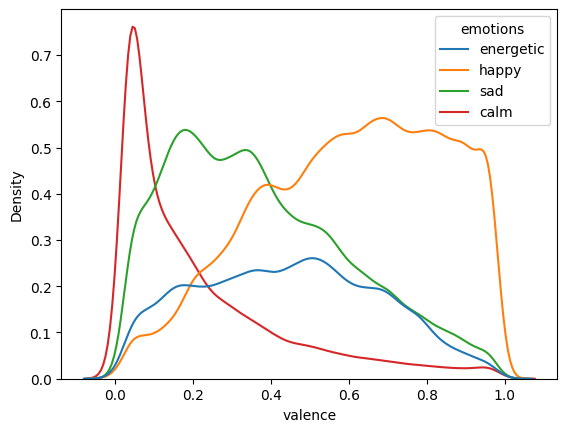

In [358]:
sns.kdeplot(x='valence', hue='emotions', data=df)

In [359]:
df.groupby('emotions')['valence'].mean()

emotions
calm         0.216861
energetic    0.444645
happy        0.602254
sad          0.374806
Name: valence, dtype: float64

**Inference:**
* The above confirms our statement that songs with higher valence tends to depict happy emotion songs, while moderate depict energetic, then those of low valence depict sad and calm emotion songs.
* in general the valence of the song affects the emotion of the song.

### Tempo vs Label

<Axes: xlabel='tempo', ylabel='Density'>

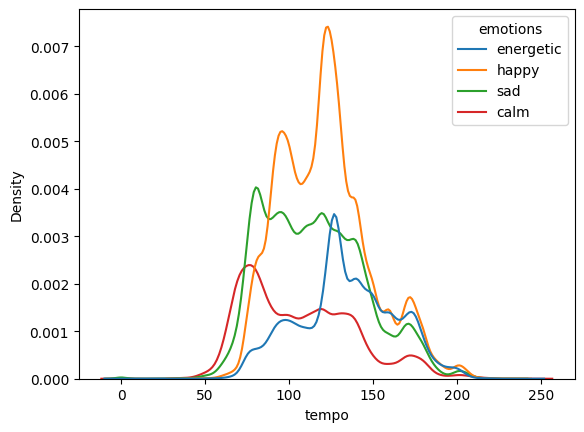

In [360]:
sns.kdeplot(x='tempo', hue='emotions', data=df)

<Axes: xlabel='emotions', ylabel='tempo'>

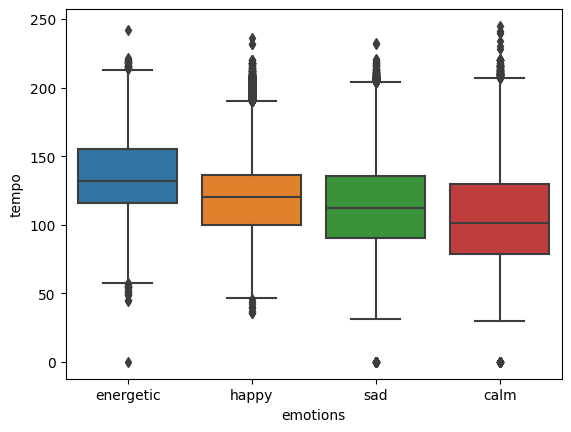

In [361]:
sns.boxplot(x='emotions', y='tempo', data=df)

In [362]:
df.groupby('emotions')['tempo'].mean()

emotions
calm         106.265884
energetic    134.008076
happy        121.195550
sad          114.793426
Name: tempo, dtype: float64

**Inference:**
* from the above, we can see that the tempo has litte or no effec on the song emotion, because almost all the values of the temp across the different emotions are mostly high no one depict any low tempo.


### Spec_rate vs Label

<Axes: xlabel='spec_rate', ylabel='Density'>

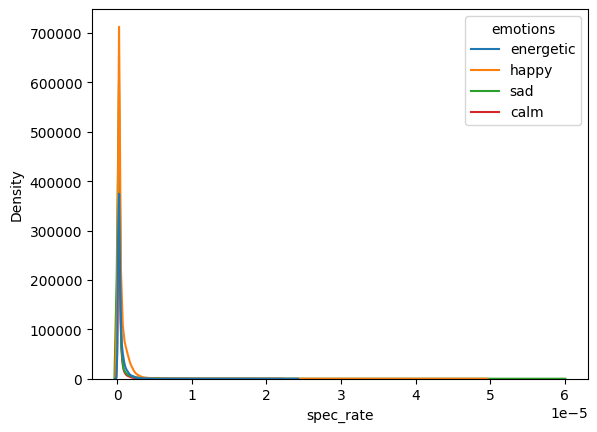

In [363]:
sns.kdeplot(x='spec_rate', hue='emotions', data=df)

<Axes: xlabel='emotions', ylabel='spec_rate'>

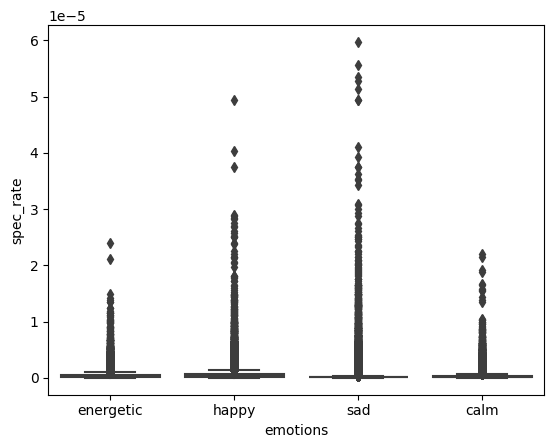

In [364]:
sns.boxplot(x='emotions', y='spec_rate', data=df)

In [365]:
df.groupby('emotions')['spec_rate'].mean()

emotions
calm         3.864222e-07
energetic    5.020470e-07
happy        5.891057e-07
sad          3.604027e-07
Name: spec_rate, dtype: float64

**Inference:**
* from the above we can clearly see that the spec_rate doesnt really tell of the emotion of a song

### Conclusion:
#### Below are list of features that mostly affects the emotions label
1. *Danceability*
2. *Energy*
3. *Loudness*
4. *Acousticness*
5. *Instrumentalness*
6. *Valence*

The above features will be engineered if interaction exist

### Using correlation matrix to understand relationship and interaction between features

In [367]:
#dropping the irrelevant columns
df2 = df.drop(columns=['emotions'])

In [368]:
df2.corr()

,duration (ms),danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,spec_rate,labels
duration (ms),1.000000,-0.104592,0.037928,0.013029,-0.036169,-0.064865,0.042792,0.030746,-0.106463,0.004055,-0.210239,-0.114876
danceability,-0.104592,1.000000,0.303467,0.414370,0.191100,-0.329593,-0.274585,-0.060786,0.521511,0.032757,0.134373,-0.229615
energy,0.037928,0.303467,1.000000,0.802448,0.144818,-0.779459,-0.360942,0.234000,0.391235,0.267508,0.053914,-0.048792
loudness,0.013029,0.414370,0.802448,1.000000,0.092935,-0.662850,-0.541214,0.132946,0.392774,0.244674,0.010403,-0.309649
speechiness,-0.036169,0.191100,0.144818,0.092935,1.000000,-0.083089,-0.167407,0.200650,0.080665,0.028011,0.750886,-0.006718
acousticness,-0.064865,-0.329593,-0.779459,-0.662850,-0.083089,1.000000,0.332339,-0.116761,-0.267692,-0.234788,-0.010079,0.053320
instrumentalness,0.042792,-0.274585,-0.360942,-0.541214,-0.167407,0.332339,1.000000,-0.116676,-0.345421,-0.112605,-0.093064,0.541671
liveness,0.030746,-0.060786,0.234000,0.132946,0.200650,-0.116761,-0.116676,1.000000,0.044799,0.031366,0.154523,-0.019277
valence,-0.106463,0.521511,0.391235,0.392774,0.080665,-0.267692,-0.345421,0.044799,1.000000,0.141520,0.061981,-0.182283
tempo,0.004055,0.032757,0.267508,0.244674,0.028011,-0.234788,-0.112605,0.031366,0.141520,1.000000,0.005517,-0.004581


In [157]:
#sns.heatmap(df2.corr(), annot=True, fmt='d')

## Feature Engineering

In [369]:
df2.describe()

,duration (ms),danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,spec_rate,labels
count,276260.000000,276260.000000,276260.000000,276260.000000,276260.000000,276260.000000,276260.000000,276260.000000,276260.000000,276260.000000,2.762600e+05,276260.000000
mean,3.873701,0.552509,0.556614,-10.370273,0.087960,0.386906,0.255386,0.189151,0.449543,119.190571,4.758558e-07,1.179049
std,1.950287,0.188941,0.279694,6.672366,0.112613,0.364564,0.373908,0.163513,0.267527,30.473167,9.202471e-07,1.021453
min,0.111767,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000
25%,2.866667,0.431000,0.341000,-12.756000,0.035900,0.033900,0.000000,0.096200,0.220000,95.066750,1.531601e-07,0.000000
50%,3.550883,0.571000,0.591000,-8.406000,0.047100,0.263000,0.001100,0.121000,0.434000,119.936000,2.346238e-07,1.000000
75%,4.414092,0.693000,0.792000,-5.848000,0.082300,0.754000,0.647000,0.226000,0.665000,138.852000,4.454110e-07,2.000000
max,65.331583,0.989000,1.000000,4.882000,0.965000,0.996000,1.000000,1.000000,1.000000,244.947000,5.971860e-05,3.000000


In [370]:
df3 = df2.copy()

#dropping spec_rate column
#df3 = df3.drop(columns=['spec_rate','duration_min'])

#scale loudness column
df3['loudness'] = df3['loudness'] / df3['loudness'].max()

#scale spec_rate column
df3['spec_rate'] = df3['spec_rate'] * 1000000

#Engineering the feature that affect the emotion label to caption interaction
df3['all_six'] = df3['danceability'] * df3['energy'] * df3['loudness'] * df3['acousticness'] * df3['instrumentalness'] * df3['valence']
df3['DE'] = df3['danceability'] * df3['energy']
df3['DL'] = df3['danceability'] * df3['loudness']
df3['DV'] = df3['danceability'] * df3['valence']
df3['EL'] = df3['energy'] + df3['loudness']
df3['EA'] = df3['energy'] * df3['acousticness']
df3['EV'] = df3['energy'] * df3['valence']
df3['LA'] = df3['loudness'] * df3['acousticness'] 
df3['LI'] = df3['loudness'] * df3['instrumentalness']
df3['LV'] = df3['loudness'] * df3['valence']
df3['AI'] = df3['acousticness'] * df3['instrumentalness']
df3['IV'] = df3['instrumentalness'] * df3['valence']
df3['TL'] = df3['tempo'] * df3['loudness']
df3['TA'] = df3['tempo'] * df3['acousticness']

#transforming features
#creating bins for the features: danceability, energy, speachness, acousticness
#instrumentalness, liveness, valence
'''
def bins_val(x):
    if 0 < x <= 0.3:
        return 1 # low
    elif 0.3 < x <= 0.6:
        return 2 # normal
    else:
        return 3 # high
    
#loudness
def loudness_val(x):
    if -13.0 < x <= -10.0:
        return 1 # very low
    elif -10.0 < x <= -7.0:
        return 2 # low
    elif -7.0 < x <= -4.0:
        return 3 # normal
    elif -4.0 < x <= -1.0:
        return 4 # high
    else:
        return 5 # very high

#tempo
#[0,56.25) Bin 2: [56.25, 112.5) [56.25,112.5) Bin 3: [112.5,168.75)[112.5,168.75)Bin 4: [168.75,225][168.75,225]

def temp_val(x):
    if 0 < x <= 56.25:
        return 1 # slow
    elif 56.25 < x <= 112.5:
        return 2 # normal
    elif 112.5 < x <= 168.75:
        return 3 # fast
    else:
        return 4 # very fast

df3['danceability'] = df3['danceability'].apply(bins_val)
df3['energy'] = df3['energy'].apply(bins_val)
df3['loudness'] = df3['loudness'].apply(loudness_val)
df3['speechiness'] = df3['speechiness'].apply(bins_val)
df3['acousticness'] = df['acousticness'].apply(bins_val)
df3['instrumentalness'] = df['instrumentalness'].apply(bins_val)
df3['liveness'] = df['liveness'].apply(bins_val)
df3['valence'] = df['valence'].apply(bins_val)
df3['tempo'] = df['tempo'].apply(temp_val)
'''


"\ndef bins_val(x):\n    if 0 < x <= 0.3:\n        return 1 # low\n    elif 0.3 < x <= 0.6:\n        return 2 # normal\n    else:\n        return 3 # high\n    \n#loudness\ndef loudness_val(x):\n    if -13.0 < x <= -10.0:\n        return 1 # very low\n    elif -10.0 < x <= -7.0:\n        return 2 # low\n    elif -7.0 < x <= -4.0:\n        return 3 # normal\n    elif -4.0 < x <= -1.0:\n        return 4 # high\n    else:\n        return 5 # very high\n\n#tempo\n#[0,56.25) Bin 2: [56.25, 112.5) [56.25,112.5) Bin 3: [112.5,168.75)[112.5,168.75)Bin 4: [168.75,225][168.75,225]\n\ndef temp_val(x):\n    if 0 < x <= 56.25:\n        return 1 # slow\n    elif 56.25 < x <= 112.5:\n        return 2 # normal\n    elif 112.5 < x <= 168.75:\n        return 3 # fast\n    else:\n        return 4 # very fast\n\ndf3['danceability'] = df3['danceability'].apply(bins_val)\ndf3['energy'] = df3['energy'].apply(bins_val)\ndf3['loudness'] = df3['loudness'].apply(loudness_val)\ndf3['speechiness'] = df3['speechine

In [371]:
0.00000015 * 1000000

0.15

In [372]:
0.0000597 * 1000000

59.7

In [373]:
df3

,duration (ms),danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,spec_rate,labels,all_six,DE,DL,DV,EL,EA,EV,LA,LI,LV,AI,IV,TL,TA
0,3.250000,0.611,0.614,-1.805612,0.0672,0.01690,0.000794,0.7530,0.520,128.050,0.344615,2,-4.726555e-06,0.375154,-1.103229,0.317720,-1.191612,0.010377,0.319280,-0.030515,-0.001434,-0.938918,1.341860e-05,4.128800e-04,-231.208675,2.164045
1,3.244017,0.638,0.781,-1.402704,0.0285,0.01180,0.009530,0.3490,0.250,122.985,0.146423,1,-1.964955e-05,0.498278,-0.894925,0.159500,-0.621704,0.009216,0.195250,-0.016552,-0.013368,-0.350676,1.124540e-04,2.382500e-03,-172.511528,1.451223
2,3.626217,0.560,0.810,-1.644613,0.0872,0.00710,0.000008,0.2410,0.247,170.044,0.400785,1,-1.037445e-08,0.453600,-0.920983,0.138320,-0.834613,0.005751,0.200070,-0.011677,-0.000013,-0.406219,5.630300e-08,1.958710e-06,-279.656550,1.207312
3,7.391300,0.525,0.699,-0.936297,0.0353,0.01780,0.000088,0.0888,0.199,92.011,0.079598,0,-1.071040e-07,0.366975,-0.491556,0.104475,-0.237297,0.012442,0.139101,-0.016666,-0.000082,-0.186323,1.566400e-06,1.751200e-05,-86.149586,1.637796
4,3.764367,0.367,0.771,-1.200942,0.1060,0.36500,0.000001,0.0965,0.163,115.917,0.469313,1,-2.971942e-08,0.282957,-0.440746,0.059821,-0.429942,0.281415,0.125673,-0.438344,-0.000002,-0.195754,5.365500e-07,2.396100e-07,-139.209621,42.309705
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277933,4.606000,0.777,0.725,-1.845965,0.0470,0.12600,0.010800,0.0917,0.851,128.349,0.170068,1,-1.204221e-03,0.563325,-1.434315,0.661227,-1.120965,0.091350,0.616975,-0.232592,-0.019936,-1.570916,1.360800e-03,9.190800e-03,-236.927732,16.171974
277934,4.746217,0.543,0.482,-2.619623,0.1940,0.08530,0.000092,0.1110,0.415,193.513,0.681244,1,-2.237761e-06,0.261726,-1.422455,0.225345,-2.137623,0.041115,0.200030,-0.223454,-0.000242,-1.087144,7.864660e-06,3.826300e-05,-506.931126,16.506659
277935,4.021783,0.527,0.942,-1.155264,0.0366,0.01150,0.000000,0.1880,0.495,148.723,0.151674,2,-0.000000e+00,0.496434,-0.608824,0.260865,-0.213264,0.010833,0.466290,-0.013286,-0.000000,-0.571856,0.000000e+00,0.000000e+00,-171.814363,1.710315
277936,3.905550,0.768,0.829,-1.046497,0.0313,0.09640,0.000029,0.0970,0.962,118.773,0.133571,1,-1.804217e-06,0.636672,-0.803710,0.738816,-0.217497,0.079916,0.797498,-0.100882,-0.000031,-1.006730,2.814880e-06,2.809040e-05,-124.295628,11.449717


In [374]:
df3.describe()

,duration (ms),danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,spec_rate,labels,all_six,DE,DL,DV,EL,EA,EV,LA,LI,LV,AI,IV,TL,TA
count,276260.000000,276260.000000,276260.000000,276260.000000,276260.000000,276260.000000,276260.000000,276260.000000,276260.000000,276260.000000,276260.000000,276260.000000,276260.000000,276260.000000,276260.000000,276260.000000,276260.000000,276260.000000,276260.000000,276260.000000,276260.000000,276260.000000,276260.000000,276260.000000,276260.000000,276260.000000
mean,3.873701,0.552509,0.556614,-2.124185,0.087960,0.386906,0.255386,0.189151,0.449543,119.190571,0.475856,1.179049,-0.016208,0.323571,-1.066628,0.274737,-1.567572,0.135879,0.279496,-1.152130,-0.819064,-0.811301,0.144113,0.080255,-242.992576,43.507197
std,1.950287,0.188941,0.279694,1.366728,0.112613,0.364564,0.373908,0.163513,0.267527,30.473167,0.920247,1.021453,0.058280,0.193719,0.612939,0.203027,1.599897,0.139106,0.224448,1.585354,1.490432,0.612152,0.291767,0.161499,154.537948,42.982931
min,0.111767,0.000000,0.000000,-12.290045,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.175392,0.000000,-5.970294,0.000000,-12.290045,0.000000,0.000000,-10.369750,-11.414789,-7.949017,0.000000,0.000000,-1898.046650,0.000000
25%,2.866667,0.431000,0.341000,-2.612864,0.035900,0.033900,0.000000,0.096200,0.220000,95.066750,0.153160,0.000000,-0.002670,0.164846,-1.368991,0.101528,-2.225392,0.018350,0.079764,-1.680002,-1.083455,-1.091321,0.000000,0.000000,-301.951058,4.063511
50%,3.550883,0.571000,0.591000,-1.721835,0.047100,0.263000,0.001100,0.121000,0.434000,119.936000,0.234624,1.000000,-0.000010,0.333516,-0.945236,0.240450,-1.121754,0.094380,0.240000,-0.398229,-0.001706,-0.667953,0.000058,0.000426,-203.086431,30.119169
75%,4.414092,0.693000,0.792000,-1.197870,0.082300,0.754000,0.647000,0.226000,0.665000,138.852000,0.445411,2.000000,0.000000,0.471953,-0.629173,0.417240,-0.443959,0.216984,0.440371,-0.042557,0.000000,-0.367058,0.047423,0.071902,-139.329060,74.083947
max,65.331583,0.989000,1.000000,1.000000,0.965000,0.996000,1.000000,1.000000,1.000000,244.947000,59.718597,3.000000,0.026388,0.964224,0.945839,0.956448,1.996000,0.994000,0.975154,0.785076,0.729644,0.908913,0.990024,0.962240,129.898000,236.822754


In [375]:
## visualizing engineered feature with the emotions

In [376]:
df3.columns

Index(['duration (ms)', 'danceability', 'energy', 'loudness', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'spec_rate', 'labels', 'all_six', 'DE', 'DL', 'DV', 'EL', 'EA', 'EV',
       'LA', 'LI', 'LV', 'AI', 'IV', 'TL', 'TA'],
      dtype='object')

In [381]:
total_col = ['duration (ms)', 'danceability', 'energy', 'loudness', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'spec_rate', 'all_six', 'DE', 'DL', 'DV', 'EL', 'EA', 'EV',
       'LA', 'LI', 'LV', 'AI', 'IV', 'TL', 'TA']

In [382]:
import math

In [383]:
# Labels: {'sad': 0, 'happy': 1, 'energetic': 2, 'calm': 3}

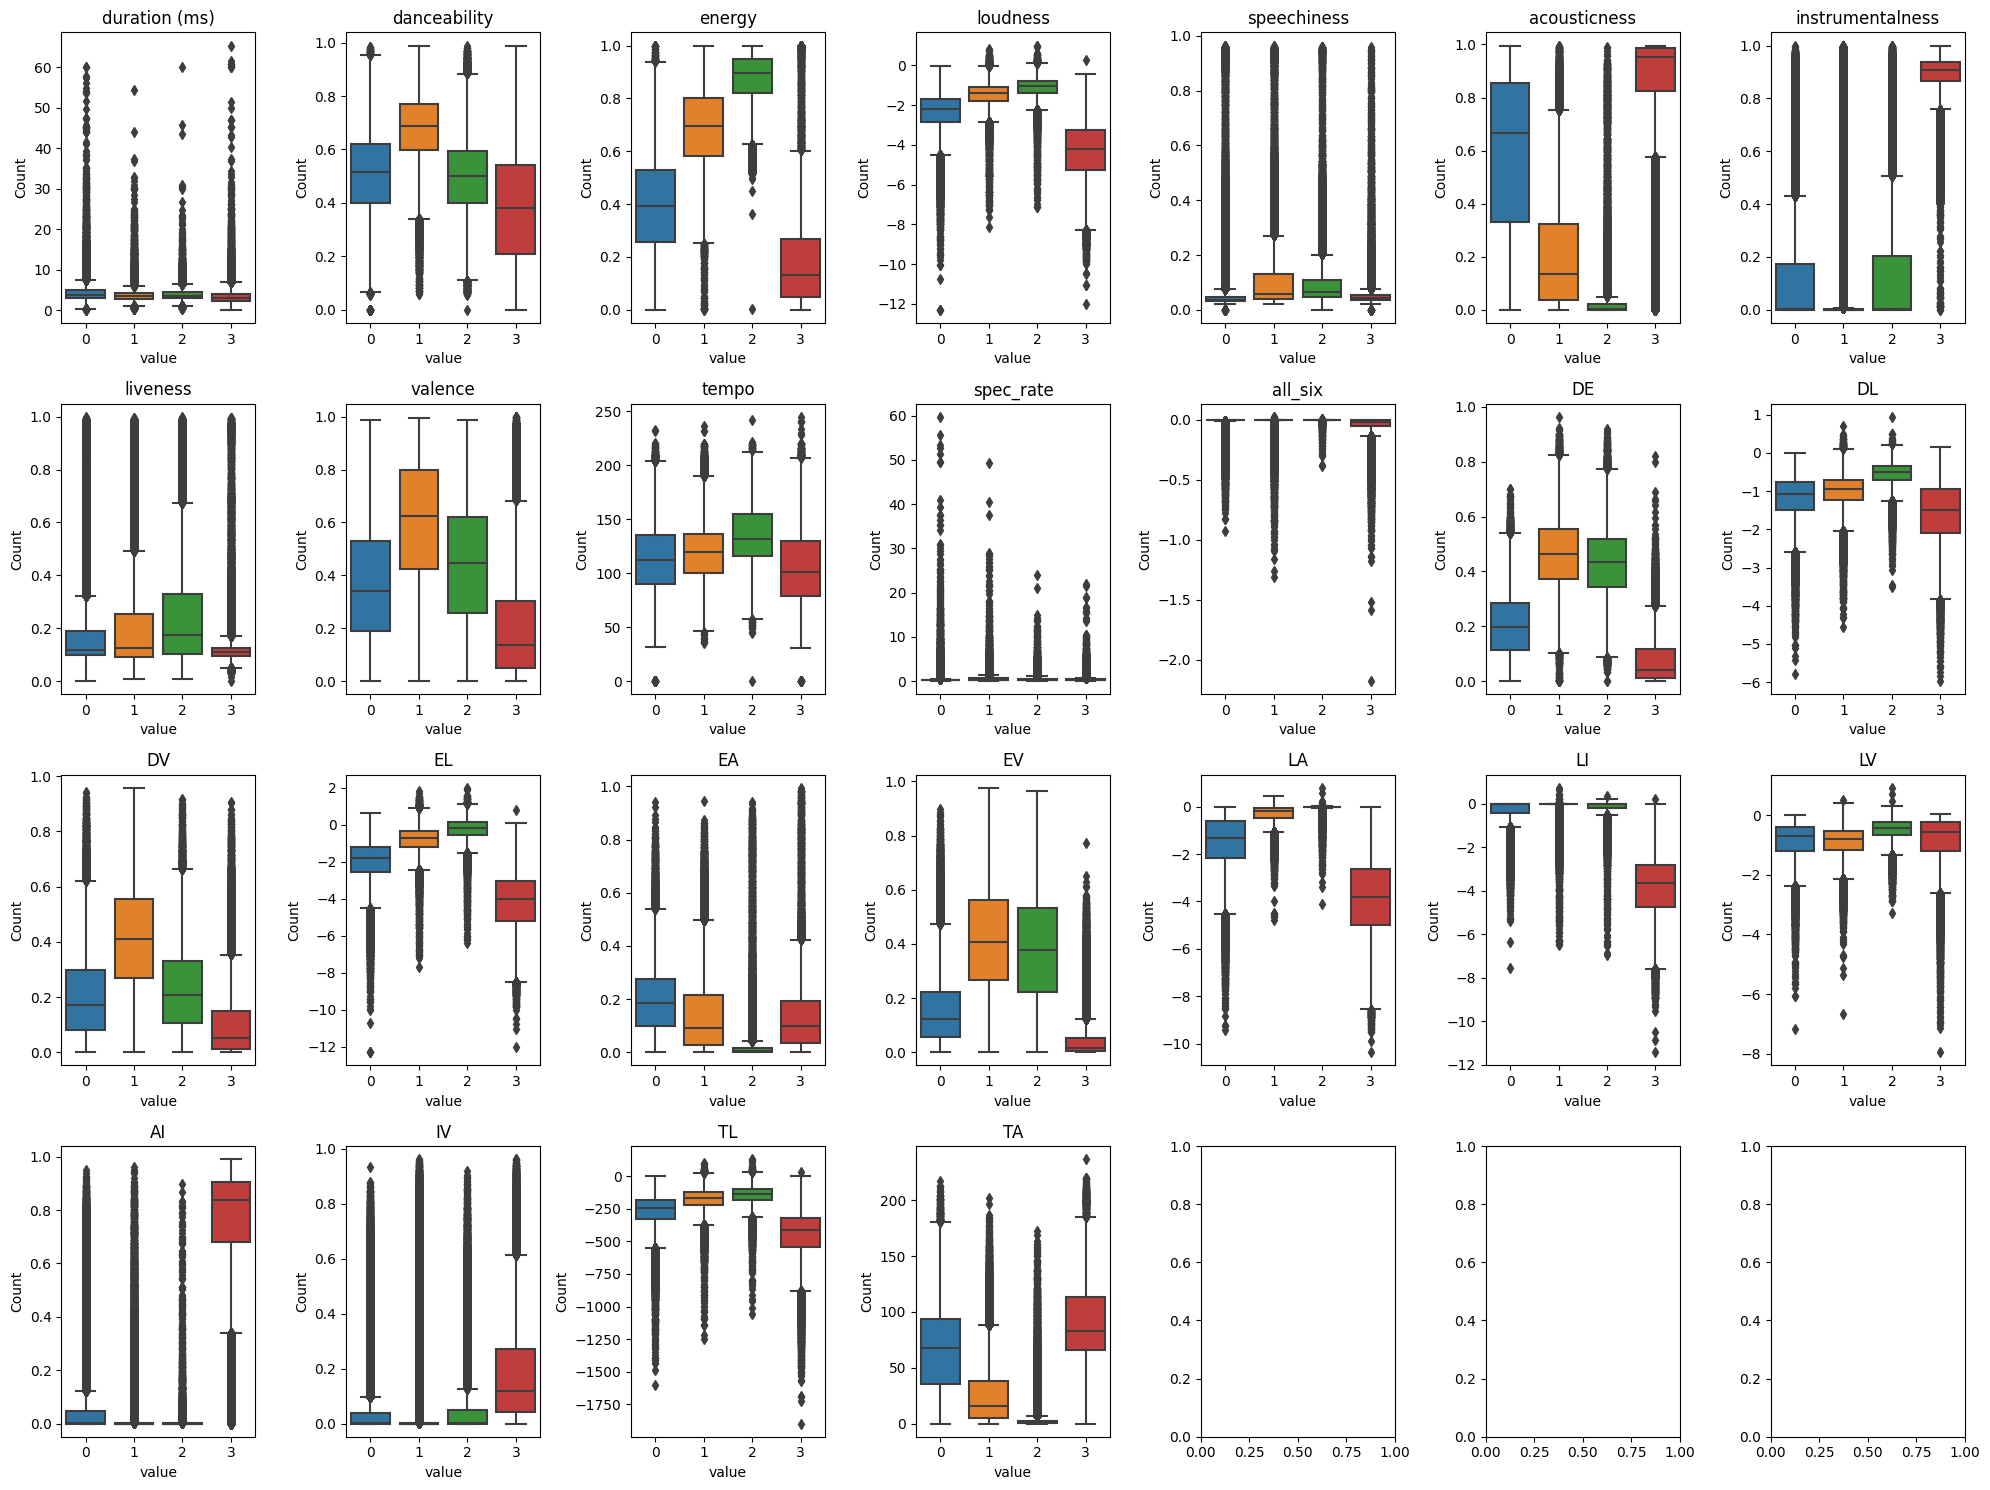

In [385]:
#using boxplot to check for outliers
num_features = len(total_col)
num_rows = 4 
num_cols = math.ceil(num_features/num_rows)

# create the subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20,15))

#flatteb the axes if needed
if num_features > 1:
    axes = axes.flatten()
    
for i, columns in enumerate(total_col):
    axe = axes[i]
    sns.boxplot(data= df3, x='labels', y=columns, ax=axe)
    axe.set_title(f'{columns}')
    axe.set_xlabel('value')
    axe.set_ylabel('Count')
    
plt.tight_layout()
plt.show()

**inference:**
* from the above visualization, it was notice that the `all_six` feature, which was engineered to capture all the six feature has no effect on the song label, lets drop it and proceed with our model building.
* moving forward we can preprocess, by scaling the features to treat outliers

In [ ]:
df4 = df3.drop(columns=['all_six'])

## Preprocessing

In [296]:
# scaling using Roburst scalar
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()

In [297]:
# separating the X and y before scaling
X = df4.drop(columns='labels')
y = df4['labels']


In [298]:
X_scaled = scaler.fit_transform(X)

In [280]:
X_scaled = X

## Model Building

In [299]:
#splitting our dataset
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

In [266]:
#importing the selected needed algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

#importing the boosting agorithms
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import AdaBoostClassifier


#importing the evaluation metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score

### Logistic Regression

              precision    recall  f1-score   support

           0       0.86      0.82      0.84     16326
           1       0.81      0.86      0.83     21145
           2       0.80      0.76      0.78      9343
           3       0.92      0.95      0.93      8438

    accuracy                           0.84     55252
   macro avg       0.85      0.85      0.85     55252
weighted avg       0.84      0.84      0.84     55252

[[13416  2008   315   587]
 [ 1589 18079  1418    59]
 [  191  2030  7099    23]
 [  374    80     3  7981]]


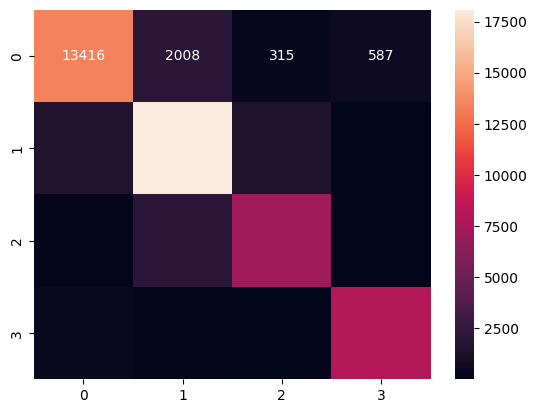

In [300]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

#prediction
y_predict_lr= lr.predict(X_test)
# evaluating with the classification report
print(classification_report(y_test, y_predict_lr))

# plotting the confusion metric
print(confusion_matrix(y_test, y_predict_lr))
sns.heatmap(confusion_matrix(y_test, y_predict_lr), annot=True, fmt='d')
plt.show()

### Decision Tree

              precision    recall  f1-score   support

           0       0.91      0.91      0.91     16326
           1       0.89      0.89      0.89     21145
           2       0.84      0.85      0.84      9343
           3       0.96      0.96      0.96      8438

    accuracy                           0.90     55252
   macro avg       0.90      0.90      0.90     55252
weighted avg       0.90      0.90      0.90     55252

[[14932   950   178   266]
 [ 1023 18759  1280    83]
 [  170  1251  7905    17]
 [  251    80    17  8090]]


<Axes: >

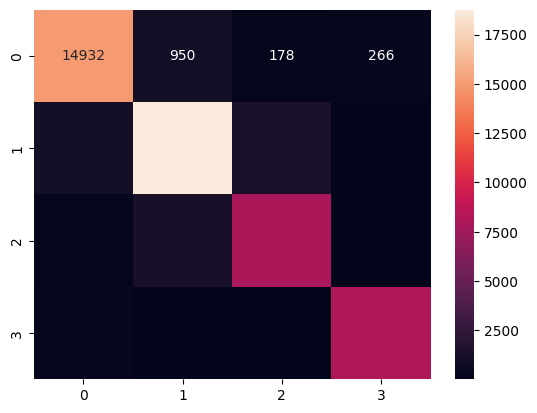

In [301]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

# prediction
y_pred_dt = dt.predict(X_test)
# evaluating
print(classification_report(y_test, y_pred_dt))
#plotting the confusion matrics
print(confusion_matrix(y_test, y_pred_dt))
sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True, fmt='d')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]),
 [Text(0, 0, 'danceability'),
  Text(1, 0, 'energy'),
  Text(2, 0, 'loudness'),
  Text(3, 0, 'speechiness'),
  Text(4, 0, 'acousticness'),
  Text(5, 0, 'instrumentalness'),
  Text(6, 0, 'liveness'),
  Text(7, 0, 'valence'),
  Text(8, 0, 'tempo'),
  Text(9, 0, 'spec_rate'),
  Text(10, 0, 'duration_min'),
  Text(11, 0, 'DE'),
  Text(12, 0, 'DL'),
  Text(13, 0, 'DV'),
  Text(14, 0, 'EL'),
  Text(15, 0, 'EA'),
  Text(16, 0, 'EV'),
  Text(17, 0, 'LA'),
  Text(18, 0, 'LI'),
  Text(19, 0, 'LV'),
  Text(20, 0, 'AI'),
  Text(21, 0, 'IV'),
  Text(22, 0, 'TL'),
  Text(23, 0, 'TA')])

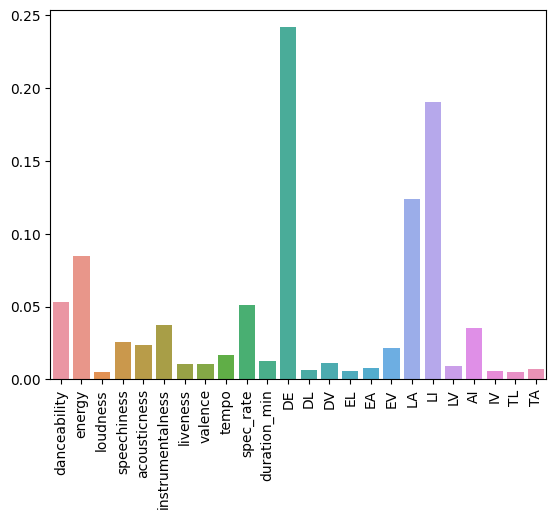

In [302]:
# making a plot of the feature importance 
sns.barplot(x=X.columns, y=dt.feature_importances_)
plt.xticks(rotation=90)

### Random Forest 

              precision    recall  f1-score   support

           0       0.95      0.94      0.95     16326
           1       0.92      0.94      0.93     21145
           2       0.92      0.89      0.90      9343
           3       0.97      0.97      0.97      8438

    accuracy                           0.94     55252
   macro avg       0.94      0.94      0.94     55252
weighted avg       0.94      0.94      0.94     55252

[[15373   622   111   220]
 [  581 19901   622    41]
 [   96   948  8291     8]
 [  155    57     3  8223]]


<Axes: >

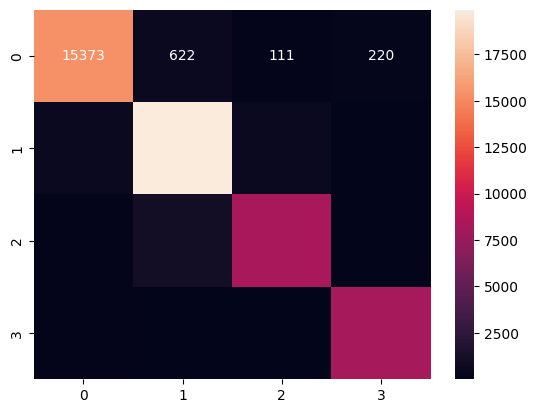

In [303]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# predicting 
y_pred_rf = rf.predict(X_test)
# evaluating
print(classification_report(y_test, y_pred_rf))

# plotting the confusion matrix
print(confusion_matrix(y_test, y_pred_rf))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]),
 [Text(0, 0, 'danceability'),
  Text(1, 0, 'energy'),
  Text(2, 0, 'loudness'),
  Text(3, 0, 'speechiness'),
  Text(4, 0, 'acousticness'),
  Text(5, 0, 'instrumentalness'),
  Text(6, 0, 'liveness'),
  Text(7, 0, 'valence'),
  Text(8, 0, 'tempo'),
  Text(9, 0, 'spec_rate'),
  Text(10, 0, 'duration_min'),
  Text(11, 0, 'DE'),
  Text(12, 0, 'DL'),
  Text(13, 0, 'DV'),
  Text(14, 0, 'EL'),
  Text(15, 0, 'EA'),
  Text(16, 0, 'EV'),
  Text(17, 0, 'LA'),
  Text(18, 0, 'LI'),
  Text(19, 0, 'LV'),
  Text(20, 0, 'AI'),
  Text(21, 0, 'IV'),
  Text(22, 0, 'TL'),
  Text(23, 0, 'TA')])

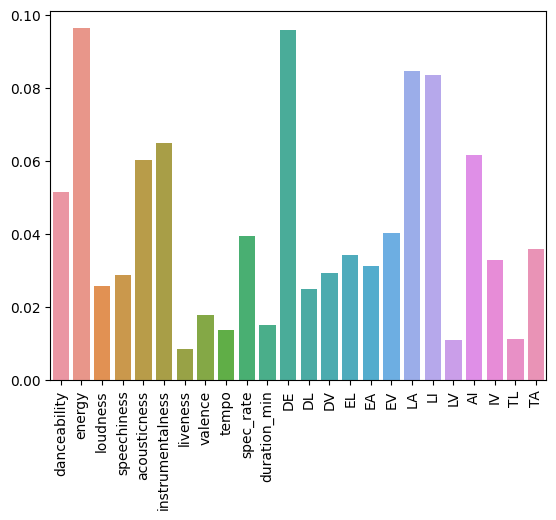

In [304]:
# plottint the feature importance
sns.barplot(x=X.columns, y=rf.feature_importances_)
plt.xticks(rotation=90)

### Catboost

              precision    recall  f1-score   support

           0       0.97      0.97      0.97     16326
           1       0.96      0.96      0.96     21145
           2       0.95      0.94      0.94      9343
           3       0.98      0.98      0.98      8438

    accuracy                           0.96     55252
   macro avg       0.96      0.96      0.96     55252
weighted avg       0.96      0.96      0.96     55252

[[15773   352    57   144]
 [  383 20320   410    32]
 [   64   532  8741     6]
 [  117    40     6  8275]]


<Axes: >

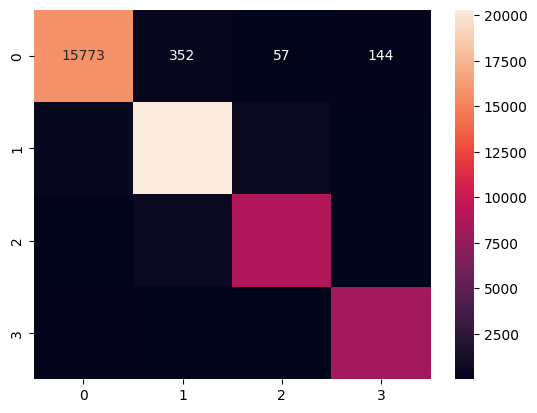

In [305]:
cb = CatBoostClassifier(random_state=42, verbose=0)
cb.fit(X_train, y_train)

# prediction
y_pred_cb = cb.predict(X_test)
# evaluating
print(classification_report(y_test, y_pred_cb))

#plotting the confusion matrix
print(confusion_matrix(y_test, y_pred_cb))
sns.heatmap(confusion_matrix(y_test, y_pred_cb), annot=True, fmt='d')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]),
 [Text(0, 0, 'danceability'),
  Text(1, 0, 'energy'),
  Text(2, 0, 'loudness'),
  Text(3, 0, 'speechiness'),
  Text(4, 0, 'acousticness'),
  Text(5, 0, 'instrumentalness'),
  Text(6, 0, 'liveness'),
  Text(7, 0, 'valence'),
  Text(8, 0, 'tempo'),
  Text(9, 0, 'spec_rate'),
  Text(10, 0, 'duration_min'),
  Text(11, 0, 'DE'),
  Text(12, 0, 'DL'),
  Text(13, 0, 'DV'),
  Text(14, 0, 'EL'),
  Text(15, 0, 'EA'),
  Text(16, 0, 'EV'),
  Text(17, 0, 'LA'),
  Text(18, 0, 'LI'),
  Text(19, 0, 'LV'),
  Text(20, 0, 'AI'),
  Text(21, 0, 'IV'),
  Text(22, 0, 'TL'),
  Text(23, 0, 'TA')])

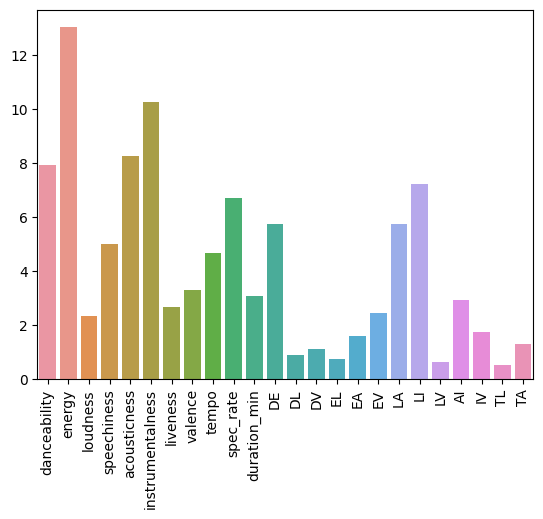

In [306]:
# feature importance
sns.barplot(x=X.columns, y=cb.feature_importances_)
plt.xticks(rotation=90)

In [307]:
cb_important =  pd.DataFrame({'features':X.columns,'values':cb.feature_importances_})
cb_important = cb_important.sort_values(by='values', ascending=False)
cb_important

,features,values
1,energy,13.034496
5,instrumentalness,10.266419
4,acousticness,8.267731
0,danceability,7.936981
18,LI,7.219448
9,spec_rate,6.703258
17,LA,5.753777
11,DE,5.735877
3,speechiness,5.002866
8,tempo,4.689934


### Xgboost

Best parameters: {'n_estimators': 532, 'max_depth': 4, 'learning_rate': 0.24326009625329156, 'subsample': 0.736214653492401, 'colsample_bytree': 0.908850163356979, 'gamma': 0.00010778044237254376, 'reg_alpha': 0.005929616007862493, 'reg_lambda': 0.4347499942773969, 'min_child_weight': 5}
Best accuracy: 0.9707521899659741

In [309]:
xgb = XGBClassifier({'n_estimators': 532, 'max_depth': 4, 'learning_rate': 0.24326009625329156, 'subsample': 0.736214653492401, 'colsample_bytree': 0.908850163356979, 'gamma': 0.00010778044237254376, 'reg_alpha': 0.005929616007862493, 'reg_lambda': 0.4347499942773969, 'min_child_weight': 5})

              precision    recall  f1-score   support

           0       0.97      0.97      0.97     16326
           1       0.96      0.96      0.96     21145
           2       0.95      0.94      0.94      9343
           3       0.98      0.98      0.98      8438

    accuracy                           0.96     55252
   macro avg       0.97      0.96      0.96     55252
weighted avg       0.96      0.96      0.96     55252

[[15841   335    47   103]
 [  354 20371   394    26]
 [   56   519  8761     7]
 [   95    34     3  8306]]


<Axes: >

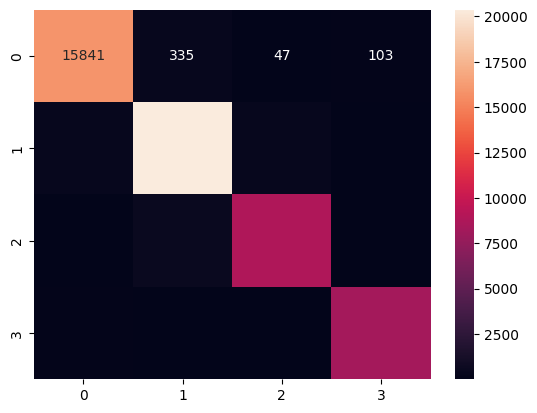

In [310]:
#xgb = XGBClassifier()
xgb.fit(X_train, y_train)

# prediction
y_pred_xgb = xgb.predict(X_test)
# Evaluation
print(classification_report(y_test, y_pred_xgb))

#plotting the confusion matrix heatmap
print(confusion_matrix(y_test, y_pred_xgb))
sns.heatmap(confusion_matrix(y_test, y_pred_xgb), annot=True, fmt='d')


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]),
 [Text(0, 0, 'danceability'),
  Text(1, 0, 'energy'),
  Text(2, 0, 'loudness'),
  Text(3, 0, 'speechiness'),
  Text(4, 0, 'acousticness'),
  Text(5, 0, 'instrumentalness'),
  Text(6, 0, 'liveness'),
  Text(7, 0, 'valence'),
  Text(8, 0, 'tempo'),
  Text(9, 0, 'spec_rate'),
  Text(10, 0, 'duration_min'),
  Text(11, 0, 'DE'),
  Text(12, 0, 'DL'),
  Text(13, 0, 'DV'),
  Text(14, 0, 'EL'),
  Text(15, 0, 'EA'),
  Text(16, 0, 'EV'),
  Text(17, 0, 'LA'),
  Text(18, 0, 'LI'),
  Text(19, 0, 'LV'),
  Text(20, 0, 'AI'),
  Text(21, 0, 'IV'),
  Text(22, 0, 'TL'),
  Text(23, 0, 'TA')])

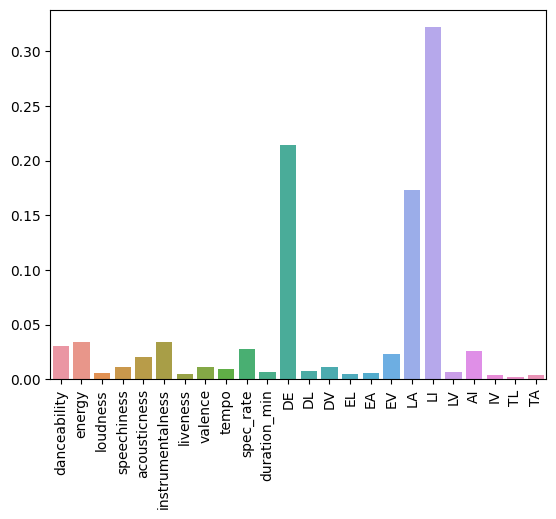

In [311]:
# plotting the feature importance 
sns.barplot(x=X.columns, y=xgb.feature_importances_)
plt.xticks(rotation=90)

In [312]:
xgb_important =  pd.DataFrame({'features':X.columns,'values':xgb.feature_importances_*100})
xgb_important = xgb_important.sort_values(by='values', ascending=False)
xgb_important

,features,values
18,LI,32.182945
11,DE,21.422390
17,LA,17.266197
1,energy,3.436923
5,instrumentalness,3.429603
0,danceability,3.028407
9,spec_rate,2.759671
20,AI,2.567096
16,EV,2.297426
4,acousticness,2.042911


### Lightgbm

              precision    recall  f1-score   support

           0       0.96      0.96      0.96     16326
           1       0.95      0.96      0.95     21145
           2       0.94      0.93      0.94      9343
           3       0.98      0.98      0.98      8438

    accuracy                           0.96     55252
   macro avg       0.96      0.96      0.96     55252
weighted avg       0.96      0.96      0.96     55252

[[15715   421    66   124]
 [  400 20272   448    25]
 [   63   601  8675     4]
 [  111    34     3  8290]]


<Axes: >

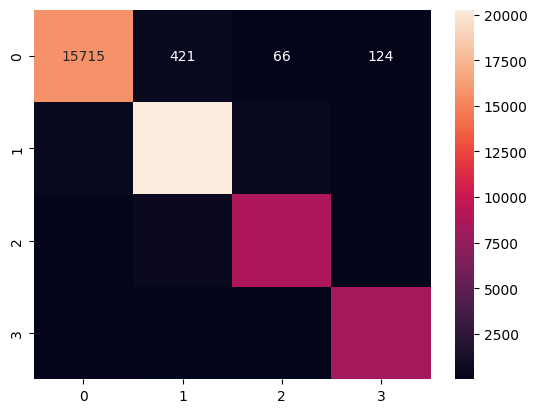

In [313]:
lgbm = LGBMClassifier(random_state=42, verbose=0)
lgbm.fit(X_train, y_train)

# prediction
y_pred_lgbm = lgbm.predict(X_test)
# Evaluating
print(classification_report(y_test, y_pred_lgbm))

#plotting the confision matix heatmap
print(confusion_matrix(y_test, y_pred_lgbm))
sns.heatmap(confusion_matrix(y_test, y_pred_lgbm), annot=True, fmt='d')


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]),
 [Text(0, 0, 'danceability'),
  Text(1, 0, 'energy'),
  Text(2, 0, 'loudness'),
  Text(3, 0, 'speechiness'),
  Text(4, 0, 'acousticness'),
  Text(5, 0, 'instrumentalness'),
  Text(6, 0, 'liveness'),
  Text(7, 0, 'valence'),
  Text(8, 0, 'tempo'),
  Text(9, 0, 'spec_rate'),
  Text(10, 0, 'duration_min'),
  Text(11, 0, 'DE'),
  Text(12, 0, 'DL'),
  Text(13, 0, 'DV'),
  Text(14, 0, 'EL'),
  Text(15, 0, 'EA'),
  Text(16, 0, 'EV'),
  Text(17, 0, 'LA'),
  Text(18, 0, 'LI'),
  Text(19, 0, 'LV'),
  Text(20, 0, 'AI'),
  Text(21, 0, 'IV'),
  Text(22, 0, 'TL'),
  Text(23, 0, 'TA')])

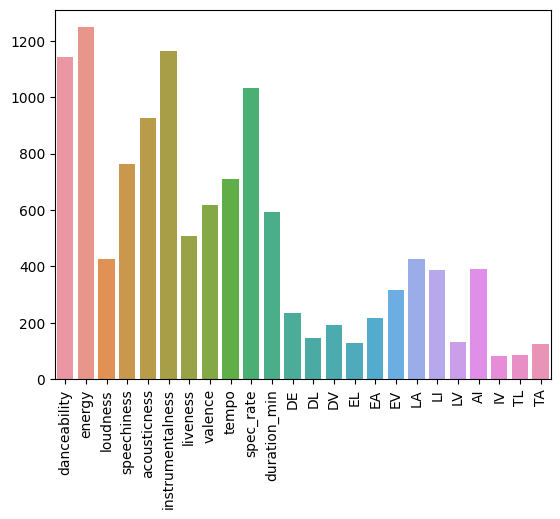

In [314]:
#plotting the feature importance 
sns.barplot(x=X.columns, y=lgbm.feature_importances_)
plt.xticks(rotation=90)

## cross-validate

#### Decision Tree

In [226]:
#cross validation using the cross validate library
from sklearn.model_selection import cross_validate

# Define the accuracy score
scoring = {'score':'accuracy'}


# Perform cross-validation with ROC-AUC as the evaluation metric
cv_results = cross_validate(dt, X_scaled, y, cv=5, scoring=scoring)

# Print the average ROC-AUC value across the folds
print("Mean accuracy:", cv_results['test_accuracy'].mean())
print("Accuracy score:", cv_results['test_accuracy'])


Mean accuracy: 0.8757909215955983
Accuracy score: [0.86469268 0.87801347 0.87634837 0.87705422 0.88284587]


In [ ]:
import tensorflow as tf
from sklearn.model_selection import KFold

# Define model architecture
model = tf.keras.models.Sequential([...])

# Define dataset
dataset = tf.data.Dataset.from_tensor_slices((X, y))

# Define k-fold cross-validation
kfold = KFold(n_splits=5, shuffle=True)

# Train and evaluate model on each fold
for train_idx, val_idx in kfold.split(dataset):
    train_data = dataset.take(train_idx)
    val_data = dataset.take(val_idx)
    
    model.fit(train_data, epochs=10)
    val_loss, val_acc = model.evaluate(val_data)
    print(f"Fold {i+1}, Val Loss: {val_loss:.3f}, Val Acc: {val_acc:.3f}")

#### Random Forest

In [227]:
#cross validation using the cross validate library
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, roc_auc_score, accuracy_score

# Define the accurac score
scoring = {'accuracy':'accuracy'}


# Perform cross-validation with ROC-AUC as the evaluation metric
rf_cv_result = cross_validate(rf, X_scaled, y, cv=5, scoring=scoring)

# Print the average ROC-AUC value across the folds
print("Mean accuracy:", rf_cv_result['test_accuracy'].mean())
print("Accuracy score:", rf_cv_result['test_accuracy'])

KeyboardInterrupt: 

#### Xgboost

In [ ]:
#cross validation using the cross validate library
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, roc_auc_score, accuracy_score

# Define the accurac score
scoring = {'accuracy':'accuracy'}


# Perform cross-validation with ROC-AUC as the evaluation metric
xgb_cv_result = cross_validate(xgb, X_scaled, y, cv=5, scoring=scoring)

# Print the average ROC-AUC value across the folds
print("Mean accuracy:", xgb_cv_result['test_accuracy'].mean())
print("Accuracy score:", xgb_cv_result['test_accuracy'])

#### catboost

In [ ]:
#cross validation using the cross validate library
from sklearn.model_selection import cross_validate

# Define the accurac score
scoring = {'accuracy':'accuracy'}


# Perform cross-validation with ROC-AUC as the evaluation metric
cb_cv_results = cross_validate(cb, X_scaled, y, cv=5, scoring=scoring)

# Print the average ROC-AUC value across the folds
print("Mean accuracy:", cb_cv_results['test_accuracy'].mean())
print("Accuracy score:", cb_cv_results['test_accuracy'])


#### Lightgbm

In [ ]:
#cross validation using the cross validate library
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, roc_auc_score, accuracy_score

# Define the accurac score
scoring = {'accuracy':'accuracy'}


# Perform cross-validation with ROC-AUC as the evaluation metric
lgbm_cv_result = cross_validate(lgbm, X_scaled, y, cv=5, scoring=scoring)

# Print the average ROC-AUC value across the folds
print("Mean accuracy:", lgbm_cv_result['test_accuracy'].mean())
print("Accuracy score:", lgbm_cv_result['test_accuracy'])

### Fine-tuning

#### catboost

In [112]:
import optuna
from catboost import CatBoostClassifier

def objective(trial):
    # Define the range of hyperparameters to be tuned
    params = {
        'iterations': trial.suggest_int('iterations', 100, 1000),
        'depth': trial.suggest_int('depth', 4, 10),
        'learning_rate': trial.suggest_float('learning_rate', 1e-3, 0.1, log=True),
        'l2_leaf_reg': trial.suggest_float('l2_leaf_reg', 1, 10),
        'border_count': trial.suggest_int('border_count', 32, 255),
        'random_strength': trial.suggest_float('random_strength', 0.1, 10),
        'bagging_temperature': trial.suggest_float('bagging_temperature', 0, 1),
        'verbose': 0
    }

    # Initialize CatBoostClassifier with suggested hyperparameters
    cb_model = CatBoostClassifier(**params, task_type='CPU')  # You can use 'GPU' if available

    # Fit model
    cb_model.fit(X_train, y_train, eval_set=(X_test, y_test), early_stopping_rounds=50, verbose=False)

    # Predict and calculate accuracy
    cb_preds =cb_model.predict(X_test)
    accuracy = accuracy_score(y_test, cb_preds)
    
    # Since Optuna maximizes the objective, return accuracy directly
    return accuracy

In [113]:
# Running the optimization
cb_study = optuna.create_study(direction='maximize')
cb_study.optimize(objective, n_trials=10)

# Print the best hyperparameters and the corresponding accuracy
print("Best parameters:", cb_study.best_params)
print("Best accuracy:", cb_study.best_value)

[I 2024-11-11 10:40:55,591] A new study created in memory with name: no-name-cb4c7b17-aed0-4806-b779-4b5d4b194cb1
[I 2024-11-11 10:45:52,317] Trial 0 finished with value: 0.9419387533482951 and parameters: {'iterations': 475, 'depth': 9, 'learning_rate': 0.039718936539679124, 'l2_leaf_reg': 4.979698951331425, 'border_count': 156, 'random_strength': 6.394808987014139, 'bagging_temperature': 0.6129970343857247}. Best is trial 0 with value: 0.9419387533482951.
[I 2024-11-11 10:54:21,485] Trial 1 finished with value: 0.9546984724534858 and parameters: {'iterations': 608, 'depth': 10, 'learning_rate': 0.04799788988552791, 'l2_leaf_reg': 3.7031665407079064, 'border_count': 127, 'random_strength': 4.270702129395883, 'bagging_temperature': 0.07085971069988783}. Best is trial 1 with value: 0.9546984724534858.
[I 2024-11-11 10:56:15,852] Trial 2 finished with value: 0.8324947513212192 and parameters: {'iterations': 670, 'depth': 5, 'learning_rate': 0.0011696828283721968, 'l2_leaf_reg': 6.5675663

Best parameters: {'iterations': 995, 'depth': 10, 'learning_rate': 0.05517552052238403, 'l2_leaf_reg': 8.105159370607822, 'border_count': 147, 'random_strength': 4.1228002436767275, 'bagging_temperature': 0.18025994923144195}
Best accuracy: 0.9607073047129515


Best parameters: {'iterations': 995, 'depth': 10, 'learning_rate': 0.05517552052238403, 'l2_leaf_reg': 8.105159370607822, 'border_count': 147, 'random_strength': 4.1228002436767275, 'bagging_temperature': 0.18025994923144195}
Best accuracy: 0.9607073047129515

#### randomforest

In [122]:
def objective(trial):
    # Define the hyperparameters to tune
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),       # Number of trees
        'max_depth': trial.suggest_int('max_depth', 3, 20),                 # Max depth of each tree
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 20), # Minimum samples required to split
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 10),   # Minimum samples at a leaf
        'max_features': trial.suggest_categorical('max_features', ['sqrt', 'log2', None]), # Number of features per split
        'bootstrap': trial.suggest_categorical('bootstrap', [True, False])  # Whether to use bootstrap sampling
    }

    # Initialize RandomForestClassifier with suggested hyperparameters
    rf_model = RandomForestClassifier(**params, random_state=42)

    # Fit the model on the training data
    rf_model.fit(X_train, y_train)

    # Predict on the validation data and calculate accuracy
    rf_preds = rf_model.predict(X_test)
    accuracy = accuracy_score(y_test, rf_preds)

    # Return accuracy, as Optuna aims to maximize this value
    return accuracy



In [125]:
# Running the optimization
rf_study = optuna.create_study(direction='maximize')
rf_study.optimize(objective, n_trials=5)

# Display the best hyperparameters and accuracy
print("Best parameters:", rf_study.best_params)
print("Best accuracy:", rf_study.best_value)

[I 2024-11-11 14:36:46,232] A new study created in memory with name: no-name-2fe413ac-8a3d-4684-9092-a6564c8b0165
[I 2024-11-11 14:43:54,427] Trial 0 finished with value: 0.8266488090928835 and parameters: {'n_estimators': 741, 'max_depth': 4, 'min_samples_split': 16, 'min_samples_leaf': 9, 'max_features': 'log2', 'bootstrap': True}. Best is trial 0 with value: 0.8266488090928835.
[I 2024-11-11 15:23:05,308] Trial 1 finished with value: 0.9368891623832621 and parameters: {'n_estimators': 883, 'max_depth': 16, 'min_samples_split': 8, 'min_samples_leaf': 6, 'max_features': 'log2', 'bootstrap': False}. Best is trial 1 with value: 0.9368891623832621.
[I 2024-11-11 16:01:34,212] Trial 2 finished with value: 0.8595525953811627 and parameters: {'n_estimators': 364, 'max_depth': 6, 'min_samples_split': 3, 'min_samples_leaf': 10, 'max_features': None, 'bootstrap': False}. Best is trial 1 with value: 0.9368891623832621.
[I 2024-11-11 17:41:51,116] Trial 3 finished with value: 0.814468254542822 a

Best parameters: {'n_estimators': 883, 'max_depth': 16, 'min_samples_split': 8, 'min_samples_leaf': 6, 'max_features': 'log2', 'bootstrap': False}
Best accuracy: 0.9368891623832621


Best parameters: {'n_estimators': 883, 'max_depth': 16, 'min_samples_split': 8, 'min_samples_leaf': 6, 'max_features': 'log2', 'bootstrap': False}
Best accuracy: 0.9368891623832621

#### xgboost

In [128]:
def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
        'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.5, 1.0),
        'gamma': trial.suggest_loguniform('gamma', 1e-6, 1e-1),
        'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-6, 1e-1),
        'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-6, 1e1),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'objective': 'multi:softprob',           # Use multi-class objective
        'num_class': len(set(y))                 # Set number of classes
    }
    
    # Initialize the XGBoost model with params
    xgb_model = XGBClassifier(**params)

    # Fit the model on training data
    xgb_model.fit(X_train, y_train, eval_set=[(X_test, y_test)], eval_metric='merror', early_stopping_rounds=50, verbose=False)

    # Predict and calculate accuracy
    preds = xgb_model.predict(X_test)
    accuracy = accuracy_score(y_test, preds)
    return accuracy

In [129]:
# Running the optimization
xgb_study = optuna.create_study(direction='maximize')
xgb_study.optimize(objective, n_trials=5)

[I 2024-11-11 19:25:39,891] A new study created in memory with name: no-name-57f9fd6a-5284-4284-8c41-626bc1a4c24a
[I 2024-11-11 19:28:01,109] Trial 0 finished with value: 0.9557844059943531 and parameters: {'n_estimators': 362, 'max_depth': 4, 'learning_rate': 0.08074403496281216, 'subsample': 0.6294573796745411, 'colsample_bytree': 0.9189923449037527, 'gamma': 2.7014515331497505e-06, 'reg_alpha': 0.03668893773609957, 'reg_lambda': 2.8140383999134758e-05, 'min_child_weight': 3}. Best is trial 0 with value: 0.9557844059943531.
[I 2024-11-12 01:06:07,372] Trial 1 finished with value: 0.9671505103887642 and parameters: {'n_estimators': 592, 'max_depth': 10, 'learning_rate': 0.05710382585694624, 'subsample': 0.9501430904573769, 'colsample_bytree': 0.5911265144064258, 'gamma': 0.0006788011126714387, 'reg_alpha': 0.0006395927817991311, 'reg_lambda': 7.576631420673729e-06, 'min_child_weight': 3}. Best is trial 1 with value: 0.9671505103887642.
[I 2024-11-12 01:06:39,246] Trial 2 finished with

In [130]:
# Display the best hyperparameters and accuracy
print("Best parameters:", xgb_study.best_params)
print("Best accuracy:", xgb_study.best_value)

Best parameters: {'n_estimators': 532, 'max_depth': 4, 'learning_rate': 0.24326009625329156, 'subsample': 0.736214653492401, 'colsample_bytree': 0.908850163356979, 'gamma': 0.00010778044237254376, 'reg_alpha': 0.005929616007862493, 'reg_lambda': 0.4347499942773969, 'min_child_weight': 5}
Best accuracy: 0.9707521899659741


Best parameters: {'n_estimators': 532, 'max_depth': 4, 'learning_rate': 0.24326009625329156, 'subsample': 0.736214653492401, 'colsample_bytree': 0.908850163356979, 'gamma': 0.00010778044237254376, 'reg_alpha': 0.005929616007862493, 'reg_lambda': 0.4347499942773969, 'min_child_weight': 5}
Best accuracy: 0.9707521899659741

#### lightgbm

In [150]:
import lightgbm as lgb

In [153]:
# Define the model
lgbm_model = LGBMClassifier()

# Define the parameter grid
param_grid = {
    'n_estimators': [200, 300],
    'learning_rate': [ 0.1, 0.2],
    'num_leaves': [50, 100],
    'max_depth': [ 5, 7],  # -1 means no limit
    'min_child_samples': [50, 100],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'reg_alpha': [1, 10],
    'reg_lambda': [1, 10]
}

# Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=lgbm_model,
    param_grid=param_grid,
    scoring='accuracy',  # Adjust scoring based on your objective
    cv=5,  # Number of folds in cross-validation
    verbose=1,
    n_jobs=-1  # Use all available cores
)


In [155]:
# Fit the model with GridSearchCV
grid_search.fit(X_train, y_train)

In [ ]:
# Best parameters and best score
print("Best parameters found: ", grid_search.best_params_)
print("Best accuracy score found: ", grid_search.best_score_)

In [ ]:
# Evaluate on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Test set accuracy: ", accuracy)

Inconclusion, XGBoost gave the optimal performance with an optimal accuracy and error